In [13]:
import mpmath as mp
q, f = 0.2, 2.0

# f1(x, y) = 0, f2(x, y) = 0 を解きたい
def f1(x, y):
    return q*y - x*y + x*(1 - x)
def f2(x, y):
    return -q*y - x*y + f
# 初期値 (x0, y0) = (0.2, 1.0) からニュートン法で解く
x_star, y_star = mp.findroot((f1, f2), (0.5, 0.5))

print("平衡点: x* =", x_star, ", y* =", y_star)

平衡点: x* = 0.240161129199916 , y* = 4.54379059694666


In [14]:
def euler_oregonator(f, x0, y0, t):
    X = np.empty_like(t); Y = np.empty_like(t)
    X[0], Y[0] = x0, y0
    h = t[1] - t[0]
    for k in range(len(t) - 1):
        dx, dy = f(X[k], Y[k])   # 現在値で傾きを評価
        X[k+1] = X[k] + h * dx   # x を更新
        Y[k+1] = Y[k] + h * dy   # y を更新
    return X, Y


In [ ]:
t = np.linspace(0, 200, 10000)  # h が小さめになるように刻みをとる
x0, y0 = 0.2, 1.2
X, Y = euler_oregonator(oregonator_rhs, x0, y0, t)

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Hiragino Sans'

q = 0.2
f = 0.7
# q = 0.02
# f = 2.0

def oregonator_rhs(x, y):
    dx = q*y - x*y + x*(1-x)
    dy = -q*y - x*y + f
    return dx, dy


In [76]:
def euler_oregonator(f, x0, y0, t):
    X = np.empty_like(t); Y = np.empty_like(t)
    X[0], Y[0] = x0, y0
    h = t[1] - t[0]

    for k in range(len(t) - 1):
        dx, dy = f(X[k], Y[k])   # 現在値で傾きを評価
        X[k+1] = X[k] + h * dx   # x を更新
        Y[k+1] = Y[k] + h * dy   # y を更新

    return X, Y

In [77]:
t = np.linspace(0, 2000, 100000)  # h が小さめになるように刻みをとる
x0, y0 = 0.02, 2.2
X, Y = euler_oregonator(oregonator_rhs, x0, y0, t)

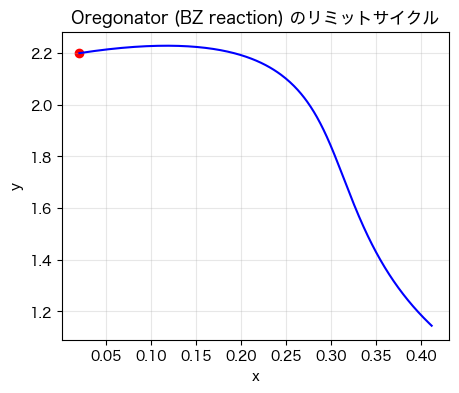

In [78]:
plt.figure(figsize=(5,4))
plt.plot(X, Y, 'b-')
# plt.scatter(X, Y, c='b')
plt.scatter(x0, y0, c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Oregonator (BZ reaction) のリミットサイクル")
plt.grid(True, alpha=0.3)
plt.show()

# KTモデル

In [241]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Hiragino Sans'

# eps = 0.01
# q = 0.02
# f = 1.5
eps = 0.01
q = 0.01
f = 0.5

def kt_rhs(x, z):
    dx = (f*z*(q-x)/(q+x) + x*(1-x))/eps
    dz = x - z
    return dx, dz

def euler_kt(f, x0, z0, t):
    X = np.empty_like(t); Z = np.empty_like(t)
    X[0], Z[0] = x0, z0
    h = t[1] - t[0]

    for k in range(len(t) - 1):
        dx, dz = f(X[k], Z[k])   # 現在値で傾きを評価
        X[k+1] = X[k] + h * dx   # x を更新
        Z[k+1] = Z[k] + h * dz   # z を更新

    return X, Z


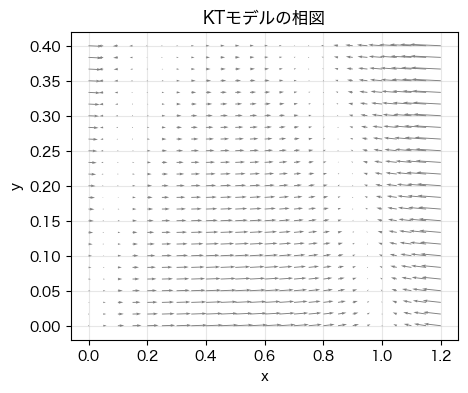

In [242]:
x = np.linspace(0, 1.2, 25)
z = np.linspace(0, 0.4, 25)
X, Z = np.meshgrid(x, z)
U, V = kt_rhs(X, Z)

fig, ax = plt.subplots(figsize=(5,4))
ax.quiver(X, Z, U, V, color='gray', angles='xy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("KTモデルの相図")
ax.grid(True, alpha=0.3)
plt.savefig(f"8_kt_phase_eps={eps}_q={q}_f={f}.png")
plt.show()

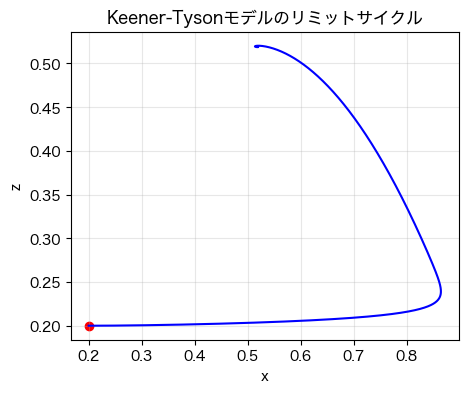

In [243]:
t = np.linspace(0, 20, 1000000)  # h が小さめになるように刻みをとる
x0, z0 = 0.2, 0.2
X, Z = euler_kt(kt_rhs, x0, z0, t)

plt.figure(figsize=(5,4))
plt.plot(X, Z, 'b-')
plt.scatter(x0, z0, c='r')
plt.xlabel("x")
plt.ylabel("z")
plt.title("Keener-Tysonモデルのリミットサイクル")
plt.grid(True, alpha=0.3)
plt.savefig(f"8_kt_xz_orbit_eps={eps}_q={q}_f={f}_x0={x0}_z0={z0}.png")
plt.show()


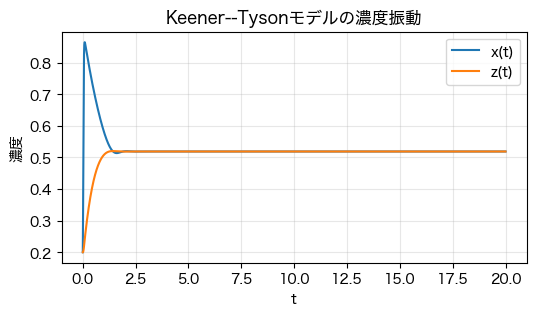

In [244]:
plt.figure(figsize=(6,3))
plt.plot(t, X, label="x(t)")
plt.plot(t, Z, label="z(t)")
plt.xlabel("t"); plt.ylabel("濃度")
plt.legend(); plt.grid(True, alpha=0.3)
plt.title("Keener--Tysonモデルの濃度振動")
plt.savefig(f"8_kt_t-xz_eps={eps}_q={q}_f={f}_x0={x0}_z0={z0}.png")
plt.show()

```{note}
<span style="color:red">**課題2**</span>

Keener–Tysonモデルでは次の3つのパラメタが存在するが，このパラメタの値を変化させることで各々のパラメタの役割を把握することを試みる．

1. `eps`の値を$0.01$から$0.1, 1, 10$と変化させたときの軌道と時間変化がどのように変化するか，図と共に述べよ．ただし，`q=0.01, r=0.8`とする．
2. `q`の値を$0.03, 0.05, 0.061, 0.07$と変化させたときの軌道と時間変化がどのように変化するか，図と共に述べよ．ただし，`eps=0.01, r=0.8`とする．
3. `r`の値を自由に変化させ，リミットサイクルが得られる値の範囲を調べよ．`r`の値を動かすのは小数点以下第一位までで良い．ただし，`eps=0.01, q=0.01`とする．
````

3: 0.6 <= r <= 2.2